In [3]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df_temperatura = pd.read_csv('/Users/paoguti/Proyecto-Meteorologico/notebooks/datasets/temperatura.csv')

In [31]:
# Filtrar los datos del 2024
df_temperatura['fecha'] = pd.to_datetime(df_temperatura['fecha'])
df_temperatura['año'] = df_temperatura['fecha'].dt.year
df_2024 = df_temperatura[df_temperatura['año'] == 2024]

df_2024.head(5)

,fecha,provincia,indicativo,tmed,tmin,horatmin,tmax,horatmax,timestamp,año
282137,2024-01-01,STA. CRUZ DE TENERIFE,C453I,13.9,10.1,NaN,17.7,14:10:00,2025-02-13 03:30:00,2024
282138,2024-01-01,MURCIA,7250C,13.3,7.4,06:35:00,19.2,15:38:00,2025-02-13 03:30:00,2024
282139,2024-01-01,SEVILLA,5612B,11.1,5.1,NaN,17.1,13:10:00,2025-02-13 03:30:00,2024
282140,2024-01-01,ZAMORA,2885K,4.0,-0.7,05:48:00,8.7,14:06:00,2025-02-13 03:30:00,2024
282141,2024-01-01,CASTELLON,8492X,8.6,1.0,23:45:00,16.3,13:30:00,2025-02-13 03:30:00,2024


In [7]:
# Mostrar las filas con NaN en la columna 'tmed'
df_2024[df_2024['tmed'].isna()]


,fecha,provincia,indicativo,tmed,tmin,horatmin,tmax,horatmax,timestamp,año
282182,2024-01-01,ILLES BALEARS,B870C,NaN,NaN,NaN,NaN,NaN,2025-02-13 03:30:00,2024
282252,2024-01-01,CACERES,3565X,NaN,NaN,NaN,NaN,NaN,2025-02-13 03:30:00,2024
282253,2024-01-01,MALAGA,6084X,NaN,NaN,NaN,NaN,NaN,2025-02-13 03:30:00,2024
282346,2024-01-01,ALMERIA,6277B,NaN,NaN,NaN,NaN,NaN,2025-02-13 03:30:00,2024
282447,2024-01-01,ZAMORA,2789H,NaN,NaN,NaN,NaN,NaN,2025-02-13 03:30:00,2024
...,...,...,...,...,...,...,...,...,...,...
605630,2024-12-31,BARCELONA,0194D,NaN,NaN,NaN,NaN,NaN,2025-02-13 03:30:00,2024
605634,2024-12-31,CASTELLON,8501,NaN,NaN,NaN,NaN,NaN,2025-02-13 03:30:00,2024
605667,2024-12-31,BURGOS,2117D,NaN,NaN,NaN,NaN,NaN,2025-02-13 03:30:00,2024
605671,2024-12-31,BALEARES,B691,NaN,4.0,NaN,NaN,NaN,2025-02-13 03:30:00,2024


In [22]:
def outliers_z_score(df_2024, z = 3):
    
    # Calculamos media y std
    mean = np.mean(df_2024['tmed'])
    std = np.std(df_2024['tmed'])
    
    # Calculamos los limites laterales (𝜇 ± z*𝜎)
    lim_l = mean - z*std
    lim_r = mean + z*std
    
    # Filtrar los outliers (valores fuera de los límites)
    outliers = df_2024[(df_2024['tmed'] < lim_l) | (df_2024['tmed'] > lim_r)]
    
    # Filtrar los datos normales (valores dentro de los límites)
    normal_data = df_2024[(df_2024['tmed'] >= lim_l) & (df_2024['tmed'] <= lim_r)]
    
    # Retornamos ambos: datos normales y outliers
    return normal_data, outliers

In [23]:
normal_data, outliers = outliers_z_score(df_2024)

print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers)}")

print(outliers[['fecha', 'provincia', 'tmed']])

Total de no-outliers: 315638
Total de outliers: 337
            fecha provincia  tmed
282663 2024-01-01    LLEIDA  -4.8
282732 2024-01-01    LLEIDA  -4.7
286023 2024-01-05    HUESCA  -5.8
286133 2024-01-05   GRANADA  -7.8
286155 2024-01-05    HUESCA  -5.1
...           ...       ...   ...
604315 2024-12-30   GRANADA  -5.6
604514 2024-12-30   GRANADA  -4.4
604771 2024-12-30      LEON  -4.6
605204 2024-12-31   GRANADA  -7.4
605408 2024-12-31   GRANADA  -6.0

[337 rows x 3 columns]


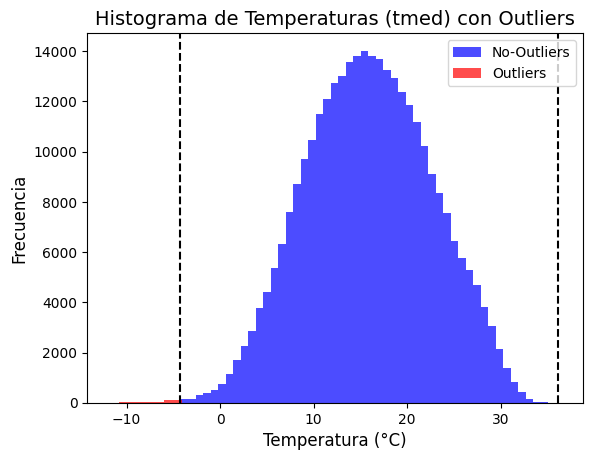

In [28]:
# Limites de los outliers (𝜇 ± 3𝜎)
# Aquí calculamos la media y la desviación estándar de 'tmed'
mean = np.nanmean(df_2024['tmed'])
std = np.nanstd(df_2024['tmed'])

lim_l = mean - 3 * std
lim_r = mean + 3 * std

# Filtrar los outliers
outliers = df_2024[(df_2024['tmed'] < lim_l) | (df_2024['tmed'] > lim_r)]
normal_data = df_2024[(df_2024['tmed'] >= lim_l) & (df_2024['tmed'] <= lim_r)]    

# No-Outliers
plt.hist(normal_data['tmed'], bins = 50, color = "blue", alpha=0.7, label="No-Outliers")

    # Outliers
plt.hist(outliers['tmed'], bins = 50, color = "red", alpha=0.7, label="Outliers")

    # 𝜇 ± 3𝜎
plt.axvline(lim_l, color = "black", linestyle = "--")
plt.axvline(lim_r, color = "black", linestyle = "--")

    # Agregar título y etiquetas
plt.title("Histograma de Temperaturas (tmed) con Outliers", fontsize=14)
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

plt.legend()
plt.show()

In [10]:
def outliers_tukey(df_2024, k = 1.5):
    
    # Calculamos los cuartiles Q1 y Q3
    q1 = np.quantile(df_2024['tmed'], 0.25)
    q3 = np.quantile(df_2024['tmed'], 0.75)
    
    # Rango InterCuartil
    ric = q3 - q1
    
    # Calculamos los límites laterales
    lim_l = q1 - k*ric
    lim_r = q3 + k*ric
    
# Filtramos los outliers y los datos normales
    outliers = pd.concat([df_2024[df_2024['tmed'] < lim_l], df_2024[df_2024['tmed'] > lim_r]])
    normal_data = df_2024[(df_2024['tmed'] >= lim_l) & (df_2024['tmed'] <= lim_r)]

    # Retornamos ambos conjuntos de datos: uno con los datos normales y otro con los outliers
    return normal_data, outliers

In [11]:
normal_data, outliers = outliers_tukey(df_2024)

print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers)}")

print(outliers)

Total de no-outliers: 0
Total de outliers: 0
Empty DataFrame
Columns: [fecha, provincia, indicativo, tmed, tmin, horatmin, tmax, horatmax, timestamp, año]
Index: []


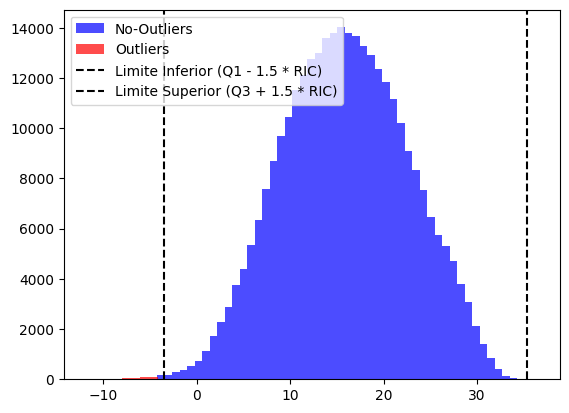

In [30]:
k = 1.5
q1 = np.nanquantile(df_2024['tmed'], 0.25)
q3 = np.nanquantile(df_2024['tmed'], 0.75)
    
    # Rango InterCuartil
ric = q3 - q1
    
    # Calculamos los límites laterales
lim_l = q1 - k*ric
lim_r = q3 + k*ric
# Graficar
plt.hist(normal_data['tmed'], bins=50, color="blue", alpha=0.7, label="No-Outliers")
plt.hist(outliers['tmed'], bins=50, color="red", alpha=0.7, label="Outliers")

# Líneas de los límites laterales
plt.axvline(lim_l, color="black", linestyle="--", label="Limite Inferior (Q1 - 1.5 * RIC)")
plt.axvline(lim_r, color="black", linestyle="--", label="Limite Superior (Q3 + 1.5 * RIC)")

plt.legend()
plt.show()